In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/Desafio Ds 2025 - Gen AI/ofertas_relampago.csv')

In [3]:
df

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,1,38.79,4.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS


# Checks y Ajustes

In [4]:
df['OFFER_START_DTTM'] = pd.to_datetime(df['OFFER_START_DTTM'])
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df['OFFER_FINISH_DTTM'])

In [5]:
df['SOLD_QUANTITY'] = np.where(df['SOLD_QUANTITY'].isna(), df['INVOLVED_STOCK'] - df['REMAINING_STOCK_AFTER_END'], df['SOLD_QUANTITY'])
df['ASP'] = df['SOLD_AMOUNT'] / df['SOLD_QUANTITY']

In [6]:
df[df['SOLD_QUANTITY'] != df['INVOLVED_STOCK'] - df['REMAINING_STOCK_AFTER_END']]

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,ASP
33,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,15,11,26.82,5.0,NaN,free_shipping,APPAREL,APP & SPORTS,MLM-BLOUSES,5.364000
37,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 21:00:00+00:00,lightning_deal,10,8,13.34,3.0,A,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-MUGS,4.446667
93,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:00:09+00:00,lightning_deal,10,9,13.58,2.0,NaN,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS,6.790000
99,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 19:28:55+00:00,lightning_deal,7,-3,15.57,6.0,A,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS,2.595000
153,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:00:03+00:00,lightning_deal,5,3,24.99,3.0,NaN,free_shipping,FOOTWEAR,APP & SPORTS,MLM-SANDALS_AND_FLIP_FLOPS,8.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48489,2021-06-19,2021-06-19 10:00:00+00:00,2021-06-19 18:00:00+00:00,lightning_deal,30,26,90.40,1.0,A,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-FRAME_POOLS,90.400000
48490,2021-06-19,2021-06-19 10:00:00+00:00,2021-06-19 18:00:00+00:00,lightning_deal,30,26,271.20,3.0,A,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-FRAME_POOLS,90.400000
48570,2021-06-19,2021-06-19 19:00:00+00:00,2021-06-20 01:00:05+00:00,lightning_deal,5,5,5.21,4.0,NaN,none,SPORTS,APP & SPORTS,MLM-KINESIOLOGY_TAPES,1.302500
48628,2021-06-19,2021-06-19 15:00:00+00:00,2021-06-19 23:00:00+00:00,lightning_deal,30,27,9.61,4.0,A,none,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-ANGLE_FINDERS,2.402500


In [7]:
df['ORIGIN'].value_counts()

ORIGIN
A    11316
Name: count, dtype: int64

In [8]:
df['SHIPPING_PAYMENT_TYPE'].value_counts()

SHIPPING_PAYMENT_TYPE
free_shipping    26658
none             22088
Name: count, dtype: int64

In [9]:
df['OFFER_TYPE'].value_counts()

OFFER_TYPE
lightning_deal    48746
Name: count, dtype: int64

In [10]:
df['OFFER_SPAN'] = df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']
df['OFFER_SPAN_MINUTES'] = round(df['OFFER_SPAN'].dt.seconds / 60)
df['SOLD_PERCENT'] = df['SOLD_QUANTITY'] / (df['INVOLVED_STOCK'] - np.where(df['REMAINING_STOCK_AFTER_END'] < 0, df['REMAINING_STOCK_AFTER_END'], 0))

# Mejores Verticales y Domains

In [11]:
dom_df = df.groupby(['DOM_DOMAIN_AGG1'])[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SOLD_PERCENT', 'OFFER_SPAN_MINUTES', 'ASP']].agg(['sum', 'max', 'mean', 'median', 'count'])
dom_df.columns = ['_'.join(col) for col in dom_df.columns.to_flat_index()]
vert_df = df.groupby(['VERTICAL'])[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SOLD_PERCENT', 'OFFER_SPAN_MINUTES']].agg(['sum', 'max', 'mean', 'median', 'count'])
vert_df.columns = ['_'.join(col) for col in vert_df.columns.to_flat_index()]

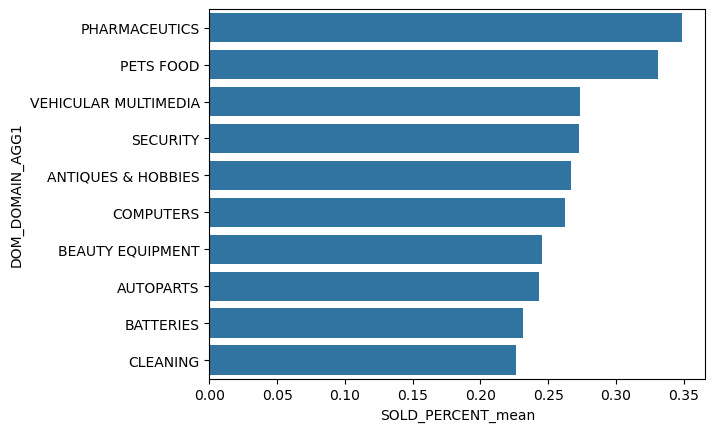

In [12]:
ax = sns.barplot(dom_df[dom_df['SOLD_PERCENT_count'] > 0].sort_values(by='SOLD_PERCENT_mean', ascending=False).iloc[:10]['SOLD_PERCENT_mean'], orient='h')
plt.show()

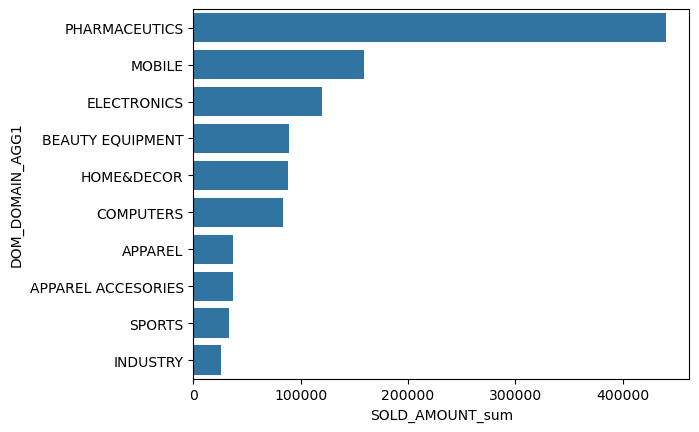

In [13]:
ax = sns.barplot(dom_df[dom_df['SOLD_PERCENT_count'] > 0].sort_values(by='SOLD_AMOUNT_sum', ascending=False).iloc[:10]['SOLD_AMOUNT_sum'], orient='h')
plt.show()

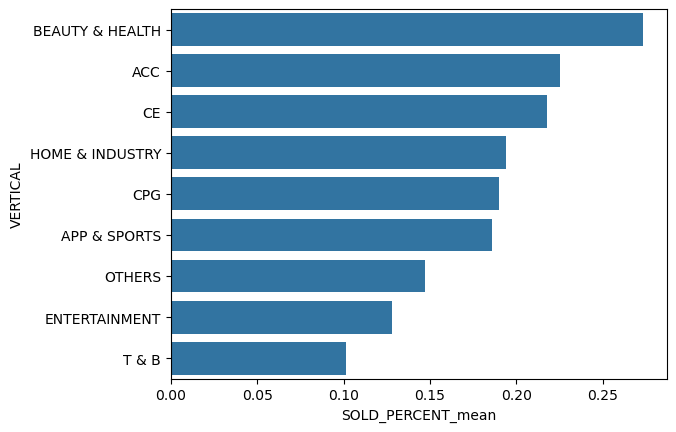

In [14]:
ax = sns.barplot(vert_df[vert_df['SOLD_PERCENT_count'] > 0].sort_values(by='SOLD_PERCENT_mean', ascending=False).iloc[:10]['SOLD_PERCENT_mean'], orient='h')
plt.show()

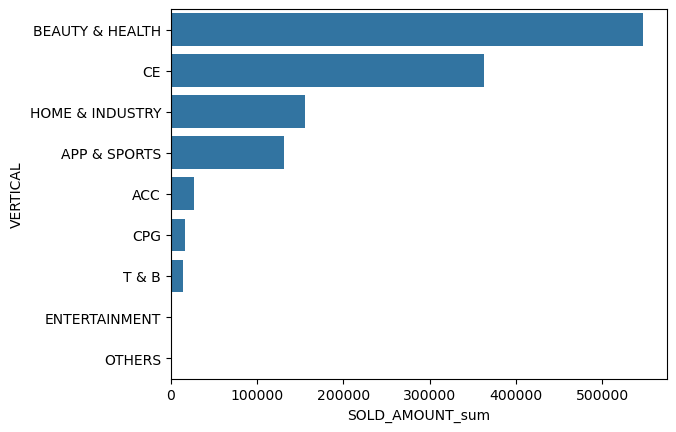

In [15]:
ax = sns.barplot(vert_df[vert_df['SOLD_PERCENT_count'] > 0].sort_values(by='SOLD_AMOUNT_sum', ascending=False).iloc[:10]['SOLD_AMOUNT_sum'], orient='h')
plt.show()

Los productos de belleza son aquellos que mas stock venden sobre el ofertado, a la vez de que son los que mas recaudan

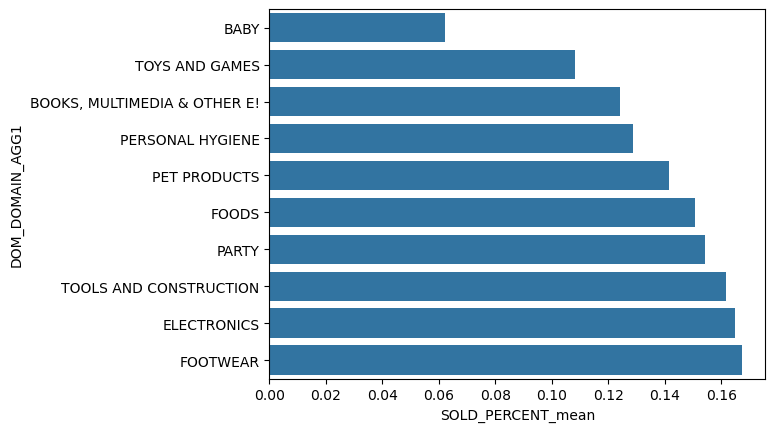

In [16]:
ax = sns.barplot(dom_df[dom_df['SOLD_PERCENT_count'] > 10].sort_values(by='SOLD_PERCENT_mean', ascending=True).iloc[:10]['SOLD_PERCENT_mean'], orient='h')
plt.show()

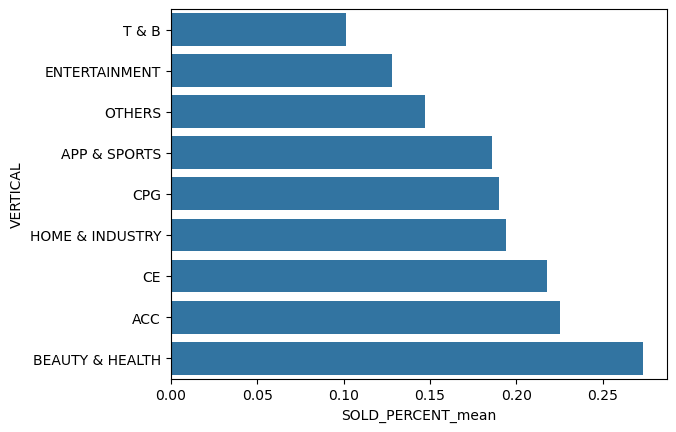

In [17]:
ax = sns.barplot(vert_df[vert_df['SOLD_PERCENT_count'] > 10].sort_values(by='SOLD_PERCENT_mean', ascending=True).iloc[:10]['SOLD_PERCENT_mean'], orient='h')
plt.show()

Los productos de bebe y juegos son los que menos stock venden del ofertado

In [18]:
dom_df[dom_df.index.isin(['BABY', 'PHARMACEUTICS'])][['INVOLVED_STOCK_sum', 'REMAINING_STOCK_AFTER_END_sum', 'SOLD_QUANTITY_sum']]

,INVOLVED_STOCK_sum,REMAINING_STOCK_AFTER_END_sum,SOLD_QUANTITY_sum
DOM_DOMAIN_AGG1,,,
BABY,17843,17137,591.0
PHARMACEUTICS,701047,606054,147723.0


Vemos de todas formas que el stock ofertado por PHARMACEUTICS es muy superior al de BABY, posiblemente, porque es mas variado y tiene un publico mucho menos especifico.

In [19]:
df[df['DOM_DOMAIN_AGG1'] == 'PHARMACEUTICS']['DOMAIN_ID'].value_counts().iloc[:10]

DOMAIN_ID
MLM-SURGICAL_AND_INDUSTRIAL_MASKS    1759
MLM-ESSENTIAL_OILS                    307
MLM-OIL_DIFFUSERS                     222
MLM-THERMOMETERS                      220
MLM-ANTIBACTERIAL_GELS                143
MLM-REUSABLE_MASKS                    142
MLM-BLOOD_PRESSURE_MONITORS            76
MLM-OXYGEN_CONCENTRATORS               44
MLM-MEDICAL_GEL_PACKS                  41
MLM-HUMIDIFIERS_AND_VAPORIZERS          9
Name: count, dtype: int64

Observando el top 10 de productos de PHARMACEUTICS entendemos el verdadero motivo: dado el periodo de tiempo, de pandemia, lo mas vendido eran aquellos articulos vinculados a ese periodo historico, los barbijos, y en menor medida alcohol en gel y otros

In [20]:
dom_df[dom_df.index.isin(['PETS FOOD', 'SECURITY'])][['INVOLVED_STOCK_sum', 'REMAINING_STOCK_AFTER_END_sum', 'SOLD_QUANTITY_sum', 'ASP_mean']]

,INVOLVED_STOCK_sum,REMAINING_STOCK_AFTER_END_sum,SOLD_QUANTITY_sum,ASP_mean
DOM_DOMAIN_AGG1,,,,
PETS FOOD,4039,2474,1523.0,5.091416
SECURITY,8402,7251,1143.0,10.808264


Aun asi, sectores de Nicho como PETS FOODS y SECURITY performan bien, posiblemente porque la oferta era muy buena viendo los precios promedio (a falta de un ASP real, no se puede afirmar de todas formas) 

# Efecto Barbijos

In [21]:
nb_df = df[df['DOMAIN_ID'] != 'MLM-SURGICAL_AND_INDUSTRIAL_MASKS']

In [22]:
dom_df = nb_df.groupby(['DOM_DOMAIN_AGG1'])[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SOLD_PERCENT', 'OFFER_SPAN_MINUTES', 'ASP']].agg(['sum', 'max', 'mean', 'median', 'count'])
dom_df.columns = ['_'.join(col) for col in dom_df.columns.to_flat_index()]

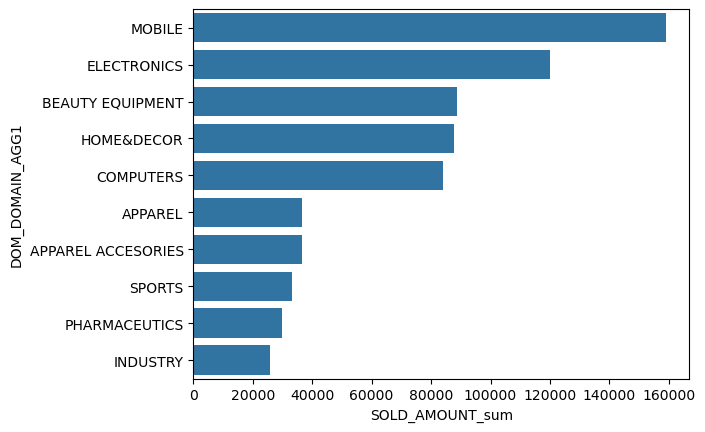

In [23]:
ax = sns.barplot(dom_df[dom_df['SOLD_PERCENT_count'] > 0].sort_values(by='SOLD_AMOUNT_sum', ascending=False).iloc[:10]['SOLD_AMOUNT_sum'], orient='h')
plt.show()

Eliminando a los barbijos del analisis de cantidades, Pharmaceutics es desplazado hacia abajo considerablemente

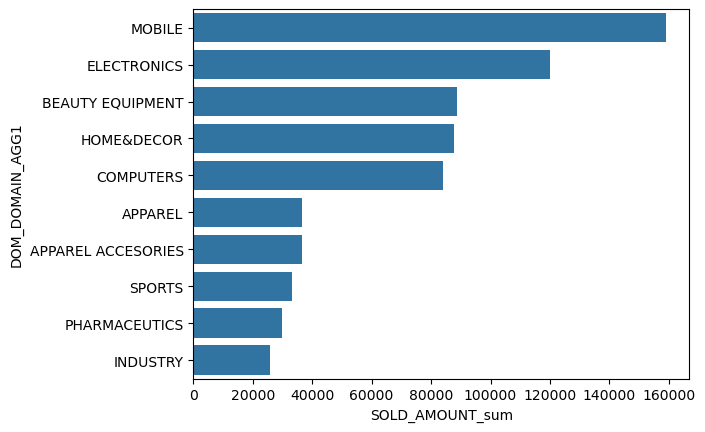

In [24]:
ax = sns.barplot(dom_df[dom_df['SOLD_PERCENT_count'] > 0].sort_values(by='SOLD_AMOUNT_sum', ascending=False).iloc[:10]['SOLD_AMOUNT_sum'], orient='h')
plt.show()

Contemplarlos en el analisis involucra incorporar un outlier considerable, dado que la venta de barbijos es propia del periodo temporal. Se buscara dar ambas visiones de ser posible.

# Efecto de Free Shipping

In [25]:
sh_df = df.groupby(['SHIPPING_PAYMENT_TYPE'])[['INVOLVED_STOCK', 'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SOLD_PERCENT', 'OFFER_SPAN_MINUTES', 'ASP']].agg(['sum', 'max', 'mean', 'median', 'count'])
sh_df.columns = ['_'.join(col) for col in sh_df.columns.to_flat_index()]

In [26]:
sh_df[['SOLD_PERCENT_count', 'SOLD_PERCENT_mean', 'ASP_median', 'SOLD_QUANTITY_sum', 'SOLD_AMOUNT_sum', 'INVOLVED_STOCK_sum']]

,SOLD_PERCENT_count,SOLD_PERCENT_mean,ASP_median,SOLD_QUANTITY_sum,SOLD_AMOUNT_sum,INVOLVED_STOCK_sum
SHIPPING_PAYMENT_TYPE,,,,,,
free_shipping,26658,0.156757,7.897,66124.0,748536.12,592537
none,22088,0.259344,2.430,203566.0,510127.38,1113939


A pesar de ofertar cantidades similares en el cerrado, aquellas ofertas relampago sin envio gratis resultaron vender mas del stock ofertado que aquellas con envio gratis (y mas unidades en general). Podria deberse a una cuestion de precio, dada la diferencia en ASP, que podria justificar el pago del envio.

In [27]:
sh_df = nb_df.groupby(['SHIPPING_PAYMENT_TYPE'])[['INVOLVED_STOCK', 'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SOLD_PERCENT', 'OFFER_SPAN_MINUTES', 'ASP']].agg(['sum', 'max', 'mean', 'median', 'count'])
sh_df.columns = ['_'.join(col) for col in sh_df.columns.to_flat_index()]

In [28]:
sh_df[['SOLD_PERCENT_count', 'SOLD_PERCENT_mean', 'ASP_median', 'SOLD_QUANTITY_sum', 'SOLD_AMOUNT_sum', 'INVOLVED_STOCK_sum']]

,SOLD_PERCENT_count,SOLD_PERCENT_mean,ASP_median,SOLD_QUANTITY_sum,SOLD_AMOUNT_sum,INVOLVED_STOCK_sum
SHIPPING_PAYMENT_TYPE,,,,,,
free_shipping,26085,0.150683,7.880,42798.0,627276.96,512588
none,20902,0.247547,2.436,85515.0,221023.24,542105


A pesar de los barbijos, el insight se sostiene

# Efecto del tiempo de oferta relampago

In [29]:
df[['OFFER_SPAN_MINUTES', 'SOLD_PERCENT']].corr()

,OFFER_SPAN_MINUTES,SOLD_PERCENT
OFFER_SPAN_MINUTES,1.000000,-0.141833
SOLD_PERCENT,-0.141833,1.000000


In [30]:
time_df = df.groupby(round(df['OFFER_SPAN_MINUTES'], -1))[['SOLD_PERCENT']].agg(['mean', 'median', 'count']).reset_index()
time_df.columns = ['_'.join(col) for col in time_df.columns.to_flat_index()]
time_df

,OFFER_SPAN_MINUTES_,SOLD_PERCENT_mean,SOLD_PERCENT_median,SOLD_PERCENT_count
0,0.0,0.000776,0.000000,3864
1,10.0,0.704318,1.000000,30
2,20.0,0.927083,1.000000,36
3,30.0,0.950768,1.000000,41
4,40.0,0.846776,1.000000,46
...,...,...,...,...
57,660.0,0.025000,0.025000,2
58,700.0,0.056667,0.056667,2
59,720.0,0.246822,0.133333,172
60,880.0,0.166667,0.100000,3


<Axes: xlabel='OFFER_SPAN_MINUTES_', ylabel='SOLD_PERCENT_count'>

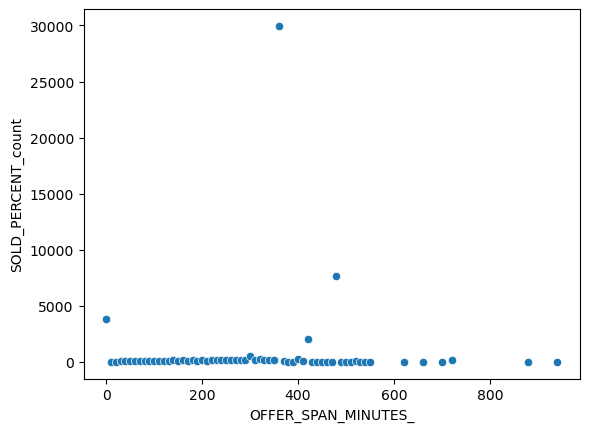

In [31]:
sns.scatterplot(time_df, x='OFFER_SPAN_MINUTES_', y='SOLD_PERCENT_count')

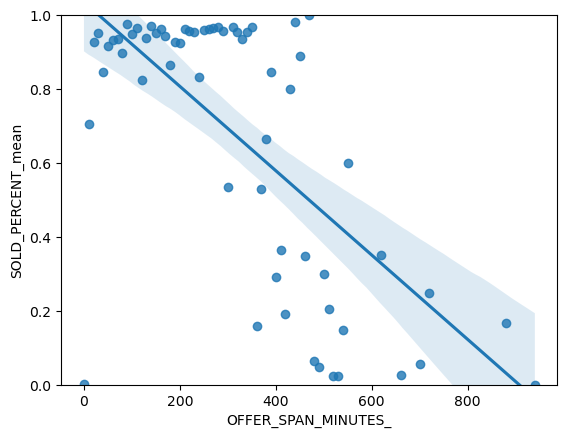

In [32]:
sns.regplot(time_df, x='OFFER_SPAN_MINUTES_', y='SOLD_PERCENT_mean')
plt.ylim(0, 1)
plt.show()

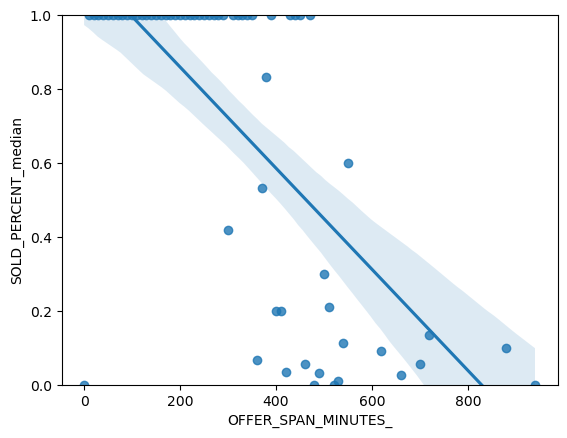

In [33]:
sns.regplot(time_df, x='OFFER_SPAN_MINUTES_', y='SOLD_PERCENT_median')
plt.ylim(0, 1)
plt.show()

Aquellas ofertas de menor tiempo de disponibilidad aparentan ser mas exitosas en vender su stock.

In [34]:
dom_df = df.groupby(['DOM_DOMAIN_AGG1'])[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SOLD_PERCENT', 'OFFER_SPAN_MINUTES']].agg(['sum', 'max', 'mean', 'median', 'count'])
dom_df.columns = ['_'.join(col) for col in dom_df.columns.to_flat_index()]

In [35]:
time_df = nb_df.groupby(round(df['OFFER_SPAN_MINUTES'], -1))[['SOLD_PERCENT']].agg(['mean', 'median', 'count']).reset_index()
time_df.columns = ['_'.join(col) for col in time_df.columns.to_flat_index()]

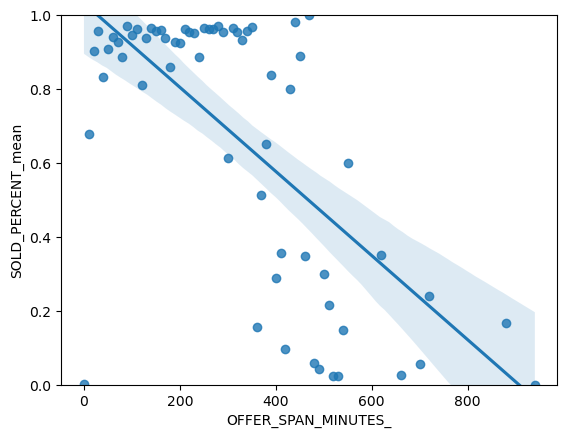

In [36]:
sns.regplot(time_df, x='OFFER_SPAN_MINUTES_', y='SOLD_PERCENT_mean')
plt.ylim(0, 1)
plt.show()

# Sobreventas

In [37]:
oos_df = df[df['REMAINING_STOCK_AFTER_END'] < 0]
oos_df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,ASP,OFFER_SPAN,OFFER_SPAN_MINUTES,SOLD_PERCENT
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,0.786667,0 days 07:02:43,423.0,1.0
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,lightning_deal,10,-1,103.03,11.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,9.366364,0 days 04:05:39,246.0,1.0
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,11.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,NaN,0 days 04:05:32,246.0,1.0
29,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 14:20:21+00:00,lightning_deal,5,-4,12.18,9.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-SOAP_AND_DETERGENT_DISPENSERS,1.353333,0 days 01:20:21,80.0,1.0
77,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 18:42:19+00:00,lightning_deal,8,-1,12.61,9.0,A,none,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS,1.401111,0 days 02:42:19,162.0,1.0


In [38]:
os_df = oos_df.groupby(['DOM_DOMAIN_AGG1'])[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SOLD_PERCENT', 'OFFER_SPAN_MINUTES']].agg(['sum', 'max', 'mean', 'median', 'count'])
os_df.columns = ['_'.join(col) for col in os_df.columns.to_flat_index()]
os_df = os_df.reset_index()

<Axes: xlabel='REMAINING_STOCK_AFTER_END_sum', ylabel='DOM_DOMAIN_AGG1'>

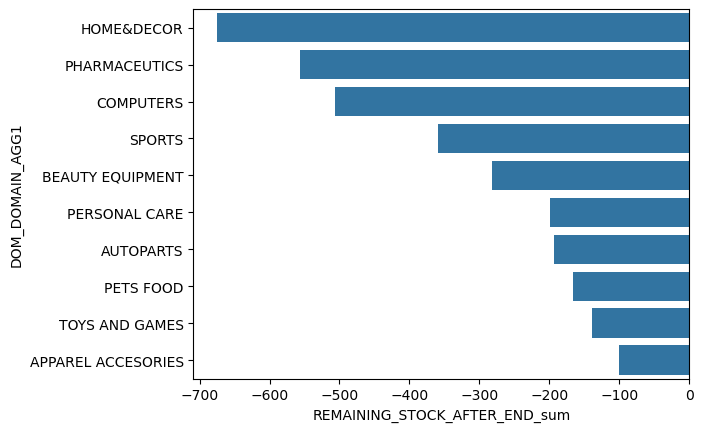

In [39]:
sns.barplot(os_df.sort_values(by='REMAINING_STOCK_AFTER_END_sum', ascending=True).iloc[:10], y='DOM_DOMAIN_AGG1', x='REMAINING_STOCK_AFTER_END_sum', orient='h')

In [40]:
oos_df[oos_df['DOM_DOMAIN_AGG1'] == 'HOME&DECOR']['DOMAIN_ID'].value_counts().iloc[:15]

DOMAIN_ID
MLM-CHRISTMAS_LIGHTS                 46
MLM-LIGHT_BULBS                      30
MLM-LED_STRIPS                       30
MLM-WALL_AND_CEILING_LIGHTS          26
MLM-TABLE_AND_DESK_LAMPS             22
MLM-MANUAL_DRINKING_WATER_PUMPS      20
MLM-COOKING_SCALES                   10
MLM-SOAP_AND_DETERGENT_DISPENSERS     8
MLM-FLOOD_LIGHTS                      7
MLM-BLANKETS                          5
MLM-INDOOR_CURTAINS_AND_BLINDS        4
MLM-KITCHEN_SUPPLIES                  4
MLM-BED_SHEETS                        4
MLM-KITCHEN_MOLDS                     3
MLM-HOME_LIGHTING_SUPPLIES            3
Name: count, dtype: int64

Mayormente pequenias decoraciones hogarenias de bajo costo, como luces, incurrieron en stocks negativos para el domain de HOME&DECOR

In [41]:
oos_df[oos_df['DOM_DOMAIN_AGG1'] == 'PHARMACEUTICS']['DOMAIN_ID'].value_counts().iloc[:15]

DOMAIN_ID
MLM-SURGICAL_AND_INDUSTRIAL_MASKS    122
MLM-THERMOMETERS                      13
MLM-OIL_DIFFUSERS                     13
MLM-ANTIBACTERIAL_GELS                 8
MLM-ESSENTIAL_OILS                     7
MLM-REUSABLE_MASKS                     6
MLM-BLOOD_PRESSURE_MONITORS            3
MLM-OXYGEN_CONCENTRATORS               1
MLM-NASAL_CPAP_MASKS                   1
MLM-ORTHOTICS                          1
Name: count, dtype: int64

Por supuesto, los barbijos, al estar en alta demanda en el momento, son el producto que mas se vendio por debajo del stock ofertado

# Falta de ventas

In [42]:
ns_df = df[df['SOLD_QUANTITY'] == 0]
ns_df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,ASP,OFFER_SPAN,OFFER_SPAN_MINUTES,SOLD_PERCENT
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,0.0,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,NaN,0 days 06:00:02,360.0,0.0
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,lightning_deal,23,23,NaN,0.0,A,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,NaN,0 days 07:00:12,420.0,0.0
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,10,10,NaN,0.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,NaN,0 days 06:00:00,360.0,0.0
11,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:00:04+00:00,lightning_deal,15,15,NaN,0.0,NaN,none,ELECTRONICS,CE,MLM-ELECTRONIC_PRODUCTS,NaN,0 days 06:00:04,360.0,0.0
15,2021-06-22,2021-06-22 15:00:00+00:00,2021-06-22 23:00:00+00:00,lightning_deal,6,6,NaN,0.0,A,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS,NaN,0 days 08:00:00,480.0,0.0


In [43]:
ns_df['OFFER_SPAN_MINUTES'].value_counts().iloc[:10]

OFFER_SPAN_MINUTES
360.0    13453
480.0     4169
0.0       3694
420.0      836
361.0      593
481.0      154
1.0        132
362.0      120
722.0       56
482.0       50
Name: count, dtype: int64

Vemos una cantidad no menor de ofertas que duraron 0 y 1 minuto, lo cual hace razonable la falta de ventas de esa oferta

In [44]:
ns_df = ns_df[ns_df['OFFER_SPAN_MINUTES'] > 1]

In [45]:
ns_df['DOM_DOMAIN_AGG1'].value_counts().iloc[:10]

DOM_DOMAIN_AGG1
HOME&DECOR                2892
APPAREL ACCESORIES        1925
APPAREL                   1630
SPORTS                    1368
ELECTRONICS               1180
PERSONAL CARE             1167
COMPUTERS                 1138
TOYS AND GAMES             859
FOOTWEAR                   674
TOOLS AND CONSTRUCTION     660
Name: count, dtype: int64

In [46]:
ns_df['DOMAIN_ID'].value_counts().iloc[:10]

DOMAIN_ID
MLM-WRISTWATCHES          229
MLM-MOTORCYCLE_HELMETS    193
MLM-SUNGLASSES            164
MLM-JACKETS_AND_COATS     162
MLM-BOOTS_AND_BOOTIES     160
MLM-MUGS                  158
MLM-SNEAKERS              156
MLM-ESSENTIAL_OILS        154
MLM-KITCHEN_MOLDS         153
MLM-WALLETS               152
Name: count, dtype: int64

In [47]:
df[df['DOMAIN_ID'].isin(ns_df['DOMAIN_ID'].value_counts().iloc[:10].index)]['SOLD_PERCENT'].mean()

0.16442142023752104

In [48]:
df['SOLD_PERCENT'].mean()

0.20324161908289262

Ropas y accesorios de exterior fueron los articulos con mas ofertas sin ventas y esos articulos tambien suelen tener un porcentaje de ventas menor al promedio. Puede atribuirse nuevamente al periodo historico, donde la gente no salia del hogar.

# Mejor dia/horario

In [49]:
dh_df = df.copy()

In [50]:
dh_df['DAYWEEK'] = dh_df['OFFER_START_DTTM'].dt.dayofweek
dh_df['DAYMONTH'] = dh_df['OFFER_START_DTTM'].dt.day
dh_df['DAYHOUR'] = dh_df['OFFER_START_DTTM'].dt.hour

In [54]:
dw_df = dh_df.groupby('DAYWEEK')[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SOLD_PERCENT', 'OFFER_SPAN_MINUTES', 'ASP']].agg(['sum', 'max', 'mean', 'median', 'count'])
dw_df.columns = ['_'.join(col) for col in dw_df.columns.to_flat_index()]
dw_df = dw_df.reset_index()

<Axes: xlabel='DAYWEEK', ylabel='SOLD_PERCENT_mean'>

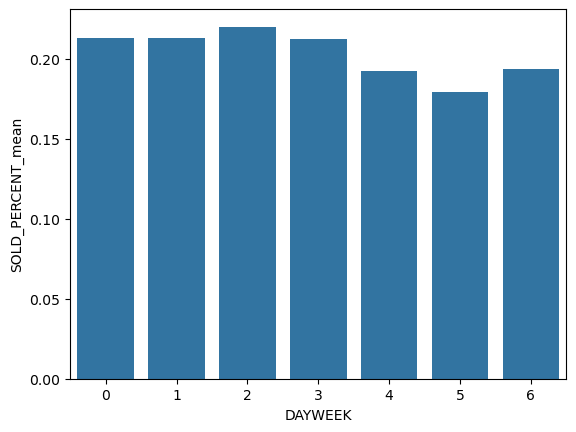

In [57]:
sns.barplot(dw_df, x='DAYWEEK', y='SOLD_PERCENT_mean')

<Axes: xlabel='DAYWEEK', ylabel='SOLD_QUANTITY_sum'>

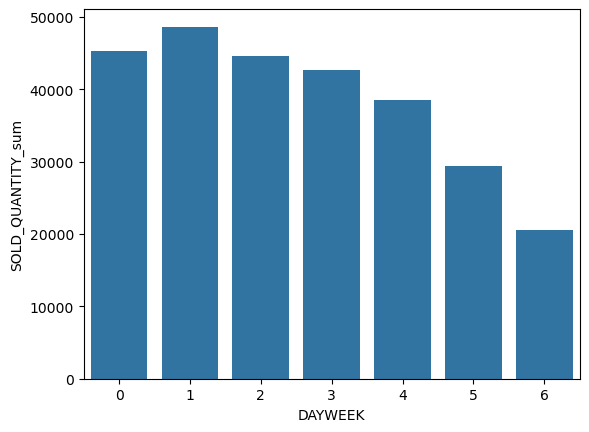

In [58]:
sns.barplot(dw_df, x='DAYWEEK', y='SOLD_QUANTITY_sum')

<Axes: xlabel='DAYWEEK', ylabel='INVOLVED_STOCK_sum'>

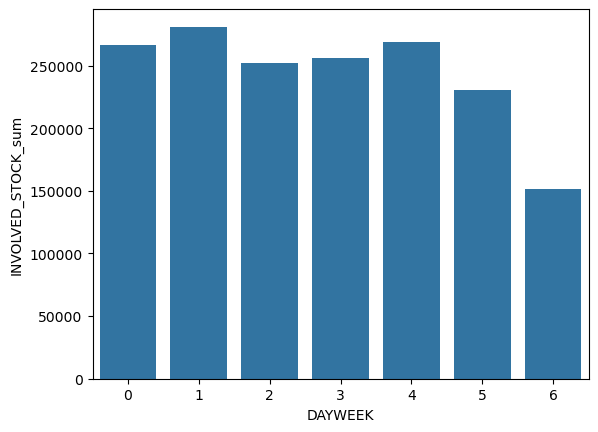

In [59]:
sns.barplot(dw_df, x='DAYWEEK', y='INVOLVED_STOCK_sum')

En porcentajes ningun dia destaca por sobre otro, en valores nominales se tiende a vender mas en dias de semana. Logicamente, se ofertan tambien mas productos los dias de semana, por ello el porcentual no muestra tendencia.

In [60]:
dhs_df = dh_df.groupby('DAYHOUR')[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SOLD_PERCENT', 'OFFER_SPAN_MINUTES', 'ASP']].agg(['sum', 'max', 'mean', 'median', 'count'])
dhs_df.columns = ['_'.join(col) for col in dhs_df.columns.to_flat_index()]
dhs_df = dhs_df.reset_index()

<Axes: xlabel='DAYHOUR', ylabel='SOLD_PERCENT_mean'>

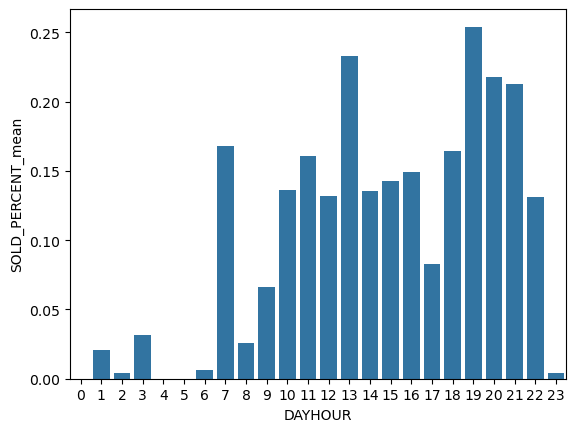

In [64]:
sns.barplot(dhs_df, x='DAYHOUR', y='SOLD_PERCENT_mean')

<Axes: xlabel='DAYHOUR', ylabel='SOLD_QUANTITY_sum'>

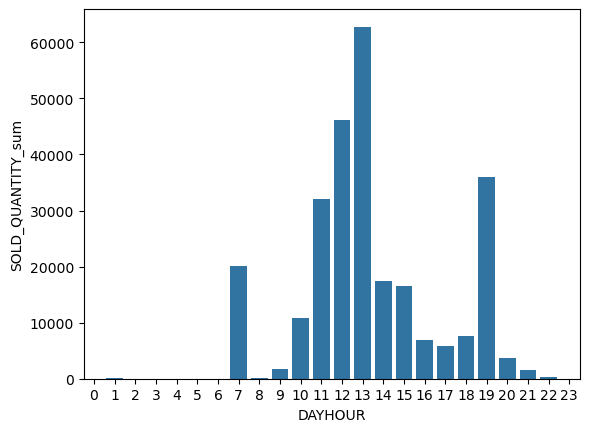

In [66]:
sns.barplot(dhs_df, x='DAYHOUR', y='SOLD_QUANTITY_sum')

<Axes: xlabel='DAYHOUR', ylabel='INVOLVED_STOCK_sum'>

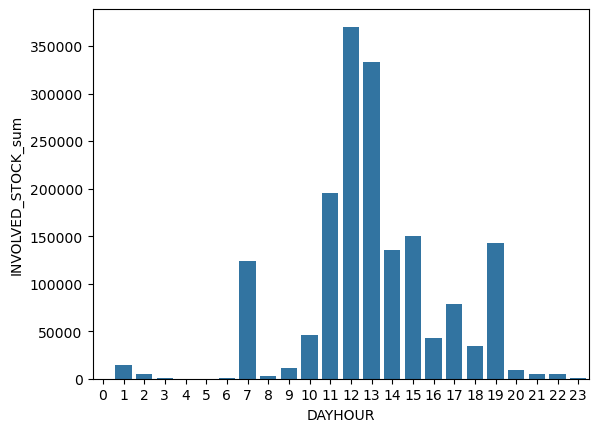

In [68]:
sns.barplot(dhs_df, x='DAYHOUR', y='INVOLVED_STOCK_sum')

Por hora resulta interesante ver que la mayoria de los productos se ofertan entre las 11 y las 14 horas, mientras que se tienen mas ventas porcentual al stock ofrecido por la noche, fuera del horario laboral. Similarmente, a las 13, en horario de almuerzo, se consiguen picos similares por fuera de la constante de entre las 10 y 16 horas.

In [71]:
dm_df = dh_df.groupby('DAYMONTH')[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SOLD_PERCENT', 'OFFER_SPAN_MINUTES', 'ASP']].agg(['sum', 'max', 'mean', 'median', 'count'])
dm_df.columns = ['_'.join(col) for col in dm_df.columns.to_flat_index()]
dm_df = dm_df.reset_index()

<Axes: xlabel='DAYMONTH', ylabel='SOLD_PERCENT_mean'>

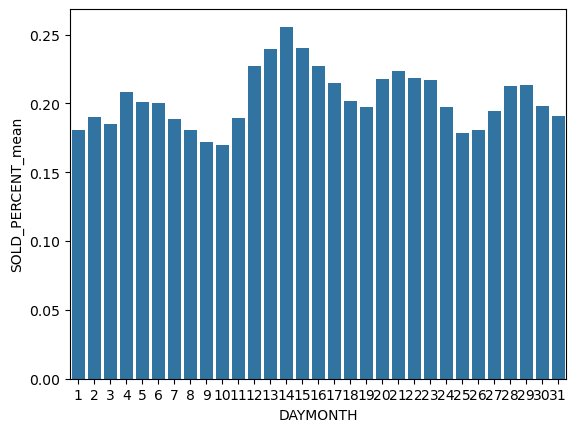

In [73]:
sns.barplot(dm_df, x='DAYMONTH', y='SOLD_PERCENT_mean')

<Axes: xlabel='DAYMONTH', ylabel='SOLD_QUANTITY_sum'>

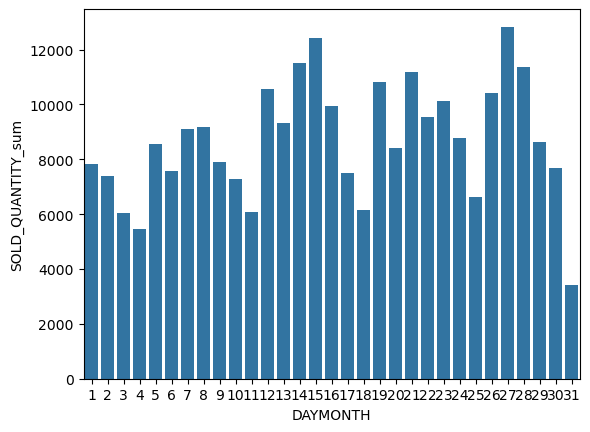

In [74]:
sns.barplot(dm_df, x='DAYMONTH', y='SOLD_QUANTITY_sum')

Las ventas resultan ser practicamente uniformes en el mes, fuera de las tendencias intrasemanales.